In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
ratings= pd.read_csv('./ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings.shape

(100836, 4)

In [4]:
tags=pd.read_csv('./ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
tags.shape

(3683, 4)

In [6]:
movies=pd.read_csv('./ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.shape

(9742, 3)

Formulate one or two ideas on how the combination of ratings and tags by
users helps the data set to establish additional value using exploratory data
analysis

Build one or more clustering models to determine similar movies to
recommend using the other ratings and tags of movies by other users as
features

## Exploratory Data Analysis

In order to combine tags and ratings, it's a good to see the statistics of these two dataframes

In [8]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [9]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
merge_tags_ratings=pd.merge(ratings,tags,on=['userId','movieId'])
merge_tags_ratings.drop(columns=['timestamp_x','timestamp_y'],axis=1,inplace=True)
merge_tags_ratings.sample(5)

,userId,movieId,rating,tag
1693,474,3461,4.0,island
2428,477,4725,4.0,Well Done
21,18,88094,3.0,britpop
579,318,68954,4.0,computer animation
326,62,135133,3.5,love story


## Tags vs ratings

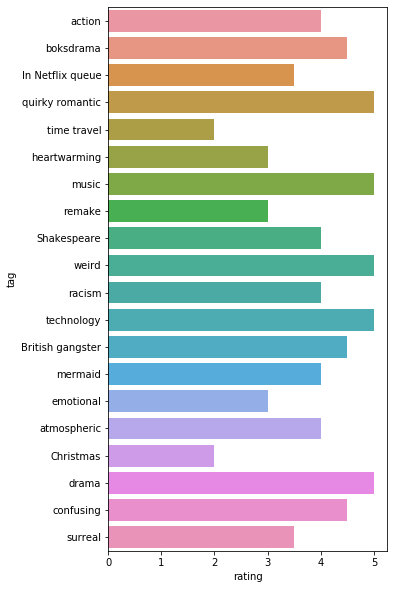

In [11]:
# Taking some tags and plotting the ratings received for them
plt.figure(figsize=(5,10))
#Tags=merge_tags_ratings[merge_tags_ratings['tag']=='Black comedy']
ax= sns.barplot(x="rating",y='tag',data=merge_tags_ratings.sample(20))
plt.show()

We can see ratings based on tag, but this doesn't give you the big picture. For each tag there are multiple ratings possible , this can be analyzed by taking any one or two tags and analyzing it

In [12]:
#taking dark comedy as a sample tag
merge_tags_ratings[merge_tags_ratings.tag=='dark comedy'].rating.describe()

count    20.000000
mean      4.450000
std       0.626183
min       3.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

We can see that <b>dark comedy</b> tag has 20  ratings in total and average rating is 4.45 and min rating is 3, but visualizing it we can see the max rating which is 5

In [13]:
dc= merge_tags_ratings.groupby('tag')
dark_comedy=dc.get_group('dark comedy')

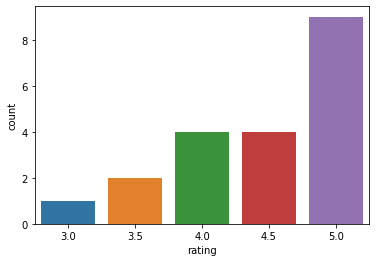

In [14]:
# we can see number of 5.0 ratings for dark comedy are high than the rest of the ratings
sns.countplot(x=dark_comedy['rating'])

## Combining tags,ratings and movies

In [15]:
#combining movies and ratings to perform some EDA
df_movies_ratings=pd.merge(movies,ratings,on=['movieId'])
df_movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [16]:
df_movies_ratings.shape

(100836, 6)

In [33]:
df_movies_ratings.sort_values(by=['movieId','rating'],inplace=True)
df_movies_ratings.reset_index(inplace=True)
#df_movies_ratings.head()

In [18]:
df_movies_ratings.drop('index',axis=1,inplace=True)
df_movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,462,1.5,1154037653
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,132,2.0,1157921785
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,153,2.0,1525548642
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,193,2.0,1435856890


In [19]:
df_movies_ratings.shape

(100836, 6)

### Average rating for each movie

It is evident from above dataframe that there are different ratinngs possible just like how different ratings were possible for tags, So let's compute the average rating for the movie which will be displayed on website

In [25]:
average_movie_rating=df_movies_ratings.groupby(['title','movieId'])['rating'].mean().reset_index()
average_movie_rating.rename(index=str,columns={"rating":"average_rating"},inplace=True)
average_movie_rating.head()

,title,movieId,average_rating
0,'71 (2014),117867,4.0
1,'Hellboy': The Seeds of Creation (2004),97757,4.0
2,'Round Midnight (1986),26564,3.5
3,'Salem's Lot (2004),27751,5.0
4,'Til There Was You (1997),779,4.0


In [26]:
#splitting the title and year column to get more accurate data
title_year=average_movie_rating['title'].str.rsplit("(",n=1,expand=True)
average_movie_rating['title']=title_year[0]
average_movie_rating['Year']=title_year[1]
average_movie_rating.head()
average_movie_rating['Year']=average_movie_rating['Year'].astype(str)
average_movie_rating['Year']=average_movie_rating['Year'].apply(lambda s:s.strip(')'))
average_movie_rating.head()

,title,movieId,average_rating,Year
0,'71,117867,4.0,2014
1,'Hellboy': The Seeds of Creation,97757,4.0,2004
2,'Round Midnight,26564,3.5,1986
3,'Salem's Lot,27751,5.0,2004
4,'Til There Was You,779,4.0,1997


In [27]:
average_movie_rating.shape

(9724, 4)

In [32]:
#merging the average rating with df_movies_ratings
#df_movies_ratings=pd.merge(df_movies_ratings,average_movie_rating,on=['movieId'])
#df_movies_ratings.drop('title_x',axis=1,inplace=True)
#df_movies_ratings.rename(index=str,columns={"title_y":"Title"},inplace=True)
df
df_movies_ratings.head()

,movieId,genres,userId,rating,timestamp,Title,average_rating,Year
0,1,Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,Toy Story,3.92093,1995
1,1,Adventure|Animation|Children|Comedy|Fantasy,462,1.5,1154037653,Toy Story,3.92093,1995
2,1,Adventure|Animation|Children|Comedy|Fantasy,132,2.0,1157921785,Toy Story,3.92093,1995
3,1,Adventure|Animation|Children|Comedy|Fantasy,153,2.0,1525548642,Toy Story,3.92093,1995
4,1,Adventure|Animation|Children|Comedy|Fantasy,193,2.0,1435856890,Toy Story,3.92093,1995


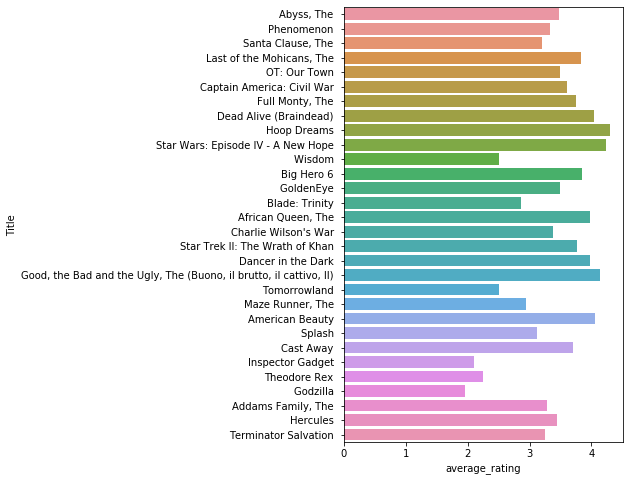

In [39]:
#plotting average_rating vs movie
plt.figure(figsize=(5,8))
ax=sns.barplot(x='average_rating',y='Title',data=df_movies_ratings.sample(30))
plt.show()